# Capstone Project Data Science: Fraud Detection Analysis

### Introduction : 

Credit card fraud is a big problem for banks because it can cost them a lot of money and make customers lose trust in them. To stop this, banks use machine learning, which helps them keep an eye on transactions and catch any suspicious activity. This technology helps prevent fraud, saves money, and ensures that real transactions go through without problems, making customers feel safe.

**Problem Statement:**  
The goal of this project is to use machine learning models to predict fraudulent credit card transactions. We will work with customer data provided and the Machine Learning Group to build a system that can effectively detect fraud.

### Project Objectives and Scope

**Primary goal of fraud detection model** 

The main goal of a fraud detection model is to correctly spot and identify fraudulent transactions (marked as Class 1) while making sure not to wrongly label genuine transactions (marked as Class 0) as fraud. The model looks at various features of transactions to find unusual patterns that may indicate fraud. By doing this, it aims to give accurate predictions, helping prevent financial losses and protect the system's integrity by catching real fraud and not flagging legitimate transactions by mistake.

Sensitivity (Recall) and Precision are critical for a fraud detection project for the following reasons:

#### Sensitivity (Recall)

- **Definition**: Sensitivity, or recall, calculates the proportion of actual fraudulent transactions correctly identified by the model.
- **Importance**:
  - **Capturing Fraudulent Transactions**: It captures most of the fraudulent transactions due to high sensitivity of the model. Missing a fraudulent transaction (false negative) can have serious financial and reputational consequences for an organization.
  - **Reducing Financial Loss**: The model reduces financial loss in cases where fraud has occurred undetected by capturing most fraudulent transactions.
  - **Building Trust**: High precision enables the development of trust among stakeholders (customers, partners, etc.) by guaranteeing that fraudulent transactions are quickly detected and taken into consideration.

#### Precision

- **Definition**: Precision measures the proportion of transactions identified as fraudulent which are actually fraudulent.
- **Importance**:
  - **Minimizing False Positives**: High precision reduces the number of legitimate transactions that are incorrectly classified as fraudulent (false positives). This is important to avoid unnecessary investigations and actions on legitimate transactions.
  - **Customer Satisfaction**: The reduction in false positives help in maintaining a pleasing customer experience. Customers might have legitimate transactions incorrectly flagged by the system as fraud resulting in inconvenience and frustration for them.
  - **Operational Efficiency**: The high precision ensures the chances of actual fraud in these flagged transactions are more likely that helps in optimal usage of resources put in fraud investigation and management.

#### Balancing Sensitivity and Precision
- **Trade-off**: Increasing the sensitivity may reduce the precision and vice versa. Therefore, the aim is to obtain an optimal balance that maximizes the detection of fraudulent transactions while minimizing the impact on legitimate transactions.
- **F1-Score**: This is the measure of combining sensitivity and precision into a single number for the performance of the model. It is especially useful in cases where a balance is required between the two.

By focusing on both sensitivity and precision, the fraud detection model aims to provide a robust solution that effectively identifies fraud while maintaining the integrity of legitimate transactions.

### Data Analysis


To determine the class distribution of fraud vs. non-fraud transactions in the dataset, we can analyze the provided data. The Class column indicates whether a transaction is fraudulent (1) or non-fraudulent (0).

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Credit Card.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
class_distribution = data['Class'].value_counts()

non_fraudulent = class_distribution[0]
fraudulent = class_distribution[1]

In [4]:
non_fraudulent

284315

In [5]:
fraudulent

492

To determine if the 'Time' feature helps in predicting fraud, we need to analyze its relationship with fraudulent and non-fraudulent transactions.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

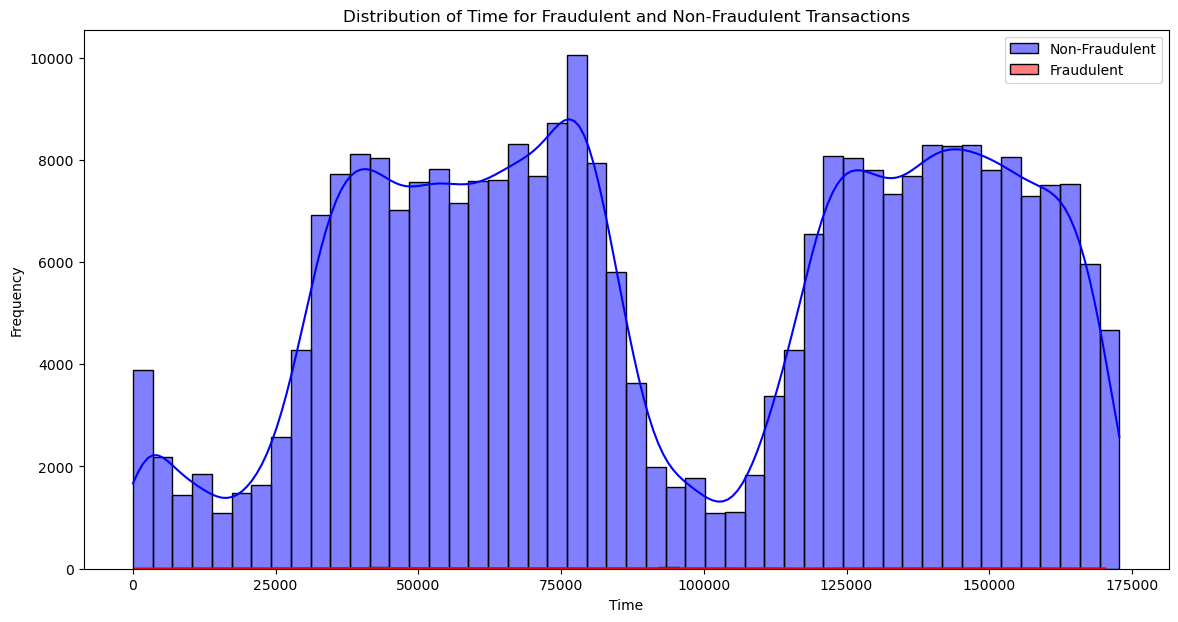

In [7]:
#  Plot the distribution of the 'Time' feature for both fraudulent and non-fraudulent transactions to observe any noticeable patterns or differences.

plt.figure(figsize=(14, 7))
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, color='blue', label='Non-Fraudulent', kde=True)
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='red', label='Fraudulent', kde=True)
plt.legend()
plt.title('Distribution of Time for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

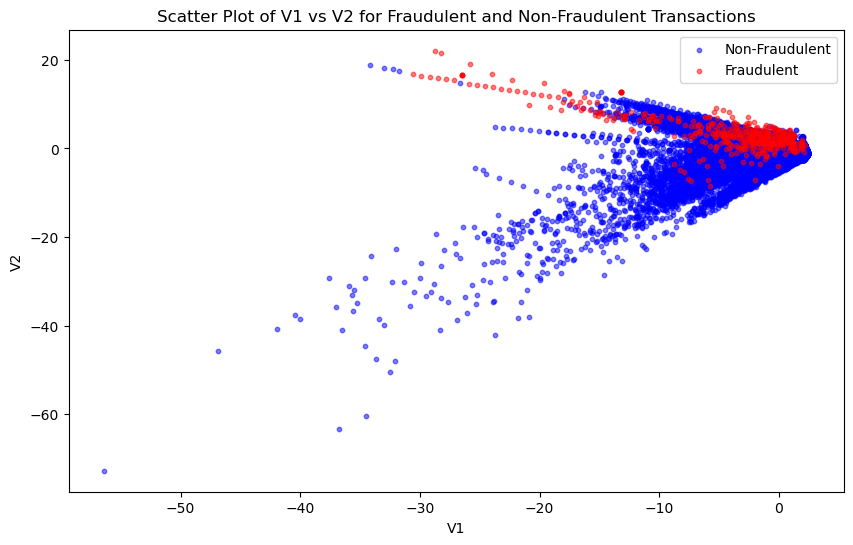

In [8]:
# Separate the data into fraudulent and non-fraudulent transactions
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Create a scatter plot for V1 vs V2
plt.figure(figsize=(10, 6))
plt.scatter(non_fraud['V1'], non_fraud['V2'], c='blue', label='Non-Fraudulent', alpha=0.5, s=10)
plt.scatter(fraud['V1'], fraud['V2'], c='red', label='Fraudulent', alpha=0.5, s=10)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Scatter Plot of V1 vs V2 for Fraudulent and Non-Fraudulent Transactions')
plt.legend()
plt.show()

Helps to identify if there are distinct patterns in the 'Time' distribution for fraudulent and non-fraudulent transactions.

### Data Preprocessing 

Standardizing the 'Amount' feature typically involves transforming it to have a mean of 0 and a standard deviation of 1.

Standardizing the 'Amount' feature is important because it puts this feature on the same scale as others, making them easier to compare. This helps improve the model's performance and stability, makes the results easier to understand, and reduces the effect of any extreme values and  resolve overfitting problem. With this, we can create a more accurate and dependable fraud detection model.

In [9]:
# Separate features and target variable
x = data.drop(columns=['Class'])  # Features
y = data['Class']                 # Target variable

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Null Values 
null_values = data.isnull().sum()
null_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# Find features which have low variance  
low_variance_features = [col for col in data.columns if data[col].var() < 0.01]
print(low_variance_features)

['Class']


Class is basically a  Target Variable annd we can't be considered  it as low variance becaz its an output or target variable and dependent feature ... so no need to drop this feature 

In [14]:
import numpy as  np

correlation_matrix = data.corr().abs()

# Selecting upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Finding features with correlation greater than 0.95
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Highly correlated features:\n", highly_correlated_features)

Highly correlated features:
 []


As according to my prospective , every column or data is relevent and does not have such high null values , and each feature are independent and does not correlated with each other . So, there is no need to drop any feaure from this dataset.  

### Model Training


In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-1.95144063, -1.16681856, -0.28654908, ...,  0.96676   ,
        -0.4486209 , -0.33974783],
       [ 1.24181171, -0.15922175, -2.43543667, ..., -0.71311931,
         0.33519183,  4.27773998],
       [ 0.05339701, -0.92214029, -0.33881865, ..., -0.15212107,
         0.26753092, -0.0533992 ],
       ...,
       [-0.31497174, -0.07400401,  0.59673261, ..., -0.29672056,
        -0.59571272, -0.32837128],
       [-0.14359433, -1.50291696,  1.41328113, ...,  1.2243654 ,
         1.01984233, -0.33974783],
       [-0.38688453,  0.62962541, -0.46917078, ...,  0.0044092 ,
         0.11724428,  0.09364469]])

In [17]:
x_test

array([[-1.12151562, -8.42703903,  5.1486402 , ..., -4.96650013,
        -3.16657662,  1.06564352],
       [-1.06346299,  0.17404952, -1.64365414, ...,  0.10230985,
         0.3099202 ,  1.66902653],
       [-1.24834248,  0.71449029, -0.35276585, ...,  0.02949291,
         0.01413826, -0.22366055],
       ...,
       [-1.32360446,  0.38159558, -0.61498614, ...,  0.1450263 ,
         0.177531  ,  0.41327168],
       [ 0.97516144,  1.06174851,  0.1019923 , ..., -0.15089508,
        -0.09379868, -0.34017349],
       [-0.70684801,  0.55744777, -0.03940111, ...,  0.19863631,
         0.10769086, -0.30492165]])

Gaussian Naive Bayes is a method which is basically used for continuous data that follows a normal distribution i.e. mean = median =  mode. It works by calculating the likelihood that a feature value belongs to a specific class based on how the feature values are distributed in the training data.

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [19]:
# Make predictions
y_pred = model.predict(x_test)

Training a Naive Bayes model involves several steps, from preparing the data to evaluating the model. Here’s a detailed breakdown:

**Data Preparation**:

**Feature Selection**: Determine the features that will be used for training the model. Ensure that these features are appropriate for the Naive Bayes variant you plan to use.
**Data Cleaning**: Address any missing values, handle outliers, and ensure the data is clean and formatted correctly.
**Encoding Categorical Features**: Convert categorical features into numerical values if necessary. In Gaussian Naive Bayes, features should be continuous in nature. For Multinomial or Bernoulli Naive Bayes, categorical features may need specific encoding.
Data Splitting:

**Train-Test Split**: Train-test split is the process of splitting the dataset into training and testing set to evaluate the model’s performance. In general, splits include 70% for training and 30% for testing or 80% for training and 20% for testing.
Feature Scaling (if applicable):

**Standardization/Normalization**: While Gaussian Naive Bayes assumes normally distributed features, scaling (standardization or normalization) can help improve performance, especially if features have different units or scales.
Model Initialization:

Choose the Appropriate Naive Bayes Variant:
**Gaussian Naive Bayes**: For continuous features assumed to follow a Gaussian distribution.
**Multinomial Naive Bayes**: For count or frequency-based features.
**Bernoulli Naive Bayes**: For binary/boolean features.

**Model Training**:

**Fit the Model**: Use the training data to train the model and this involves calculating:
**Prior Probabilities**: The probability of each class.
**Likelihood Probabilities**: The proportion of occurrences of feature values for each class.
**Training Process**: For Gaussian Naive Bayes, compute the mean and variance of features for each class. For Multinomial Naive Bayes, calculate the frequency of feature occurrences.

**Model Evaluation**:

**Prediction**: We basically use the trained model to make predictions on the test set.
**Performance Metrics**: To assess its performance, Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

**Hyperparameter Tuning (if necessary):**

**Optimization**: Although Naive Bayes typically has fewer hyperparameters compared to other models, adjustments such as smoothing parameters in Multinomial Naive Bayes (e.g., alpha in Laplace smoothing) can be tuned for better performance.
Model Validation:

**Cross-Validation**: Optionally, perform cross-validation to assess how well the model generalizes to unseen data. This involves splitting the data into multiple subsets (folds) and training/testing the model on different combinations of these subsets.

**Final Model Training:**

Re-training on Full Data: Once the model is tuned and validated, you may choose to retrain it on the entire dataset to leverage all available data for final model training.

### Model Evaluation


Sensitivity (Recall): The proportion of actually positive cases that were correctly classified by the model. It measures how good the model detects positive features.

Precision: The proportion of predicted positive cases that were actually positive. It measures how many of the predicted positives are truly positive.

Evaluating model performance involves several metrics, each providing insights into different aspects of the model's effectiveness. 

1. **Accuracy**  :  It classified instances (both positive and negative) out of the total instances.

2. **Sensitivity (Recall)**: Return the proportion of actual positive cases that are correctly identified by the model is termed as recall.

3. **Precision**: The proportion of predicted positive cases that are actually positive.

4. **F1 Score**: Precision and recall finding a common ground in their mean.

5. **Area Under the ROC Curve (AUC-ROC)**:  The model's capacity in distinguishing classes is determined at all threshold values.

6. **Area Under the Precision-Recall Curve (AUC-PR)**: Measures the trade-off between precision and recall across different thresholds. 

7. **Confusion Matrix**: A table that shows true positive, true negative, false positive, and false negative predictions. 




In [20]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[83452,  1855],
       [   21,   115]], dtype=int64)

In [22]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



### Results and Interpretation


To derive key findings from your model's predictions, you should analyze the results based on several performance metrics and insights. Here’s a structured approach to extracting key findings:

### 1. **Overall Performance Metrics**

- **Accuracy**: To provides correct proportion of overall True Positive. A high accuracy indicates that the model performs well across both classes, but may be misleading if the classes are imbalanced.

- **Precision**: Precision help in to measures how many of the positive predictions are actually corrected. High precision indicates it is likely to be correct, that when the model predicts a positive class.

- **Recall (Sensitivity)**: Recall helps in measuring how many of the actual positive cases were correctly recognized. High recall indicates that the model detects most of the positive cases but may include more false positives.

- **F1 Score**:Precision and recall have been consolidated into a single metric.. It is especially useful when you need to balance precision and recall, providing a more holistic view of model performance.

- **AUC-ROC**: Indicates how well the model separates classes across different thresholds. A better model is implied by a higher AUC-ROC number.

- **AUC-PR**: Provides insights into precision-recall trade-offs, which can be useful for imbalanced datasets.

### 2. **Confusion Matrix Analysis**

- **True Positives (TP)**: Correctly predict positive class.
- **False Positives (FP)**: The count of negative class misclassified as positive.
- **True Negatives (TN)**: Correctly predict negative class.
- **False Negatives (FN)**: The count of instances from the positive class misclassified as negative.

From the confusion matrix:
- **High TP** and **low FN**: Indicates effective detection of positive cases.
- **Low FP**: Indicates effective filtering of negative cases.
- **High TN**: Indicates effective detection of negative cases.

### 3. **Error Analysis**

- **False Positive Rate (FPR)**: 
  \[
  \text{FPR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}
  \]
   Demonstrates the proportion of errors in identifying negatives as positives.

- **False Negative Rate (FNR)**: 
  \[
  \text{FNR} = \frac{\text{False Negatives (FN)}}{\text{False Negatives (FN)} + \text{True Positives (TP)}}
  \]
  Demonstrates the error rate for identifying positives as negatives.

- **Error Types**: Determine the types of errors your model makes (e.g., more false positives vs. false negatives) and their potential impact.

### 4. **Model Calibration**

- **Probability Scores**: Assess whether the probability scores provided by the model are well-calibrated. A well-calibrated model will always have the predicted probabilities mirror the actual chances of the positive class..

### 5. **Feature Importance and Impact**

- **Feature Analysis**: Evaluate which features contribute most to the model’s predictions. Understanding feature importance can provide insights into what drives model decisions and help in feature engineering or selection.

### 6. **Comparative Analysis**

- **Benchmarking**: Compare your model’s performance against baseline models or previous models to understand improvements or regressions.


### Conclusion

Your model performs well with a strong overall accuracy and high AUC-ROC. However, there are areas for improvement in precision and recall. The false positive rate suggests a need to reduce false positives, and the false negative rate indicates opportunities to capture more positive cases.

This structured approach will help you draw actionable insights from your model’s predictions and guide further improvements.

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.9119216218378051

Threshold values in classification models determine the point at which a predicted probability is converted into a class label. Altering the threshold parameter can result in significant fluctuations in the model's merit functions. Here’s a breakdown of how different threshold values impact key performance metrics:

### 1. **Threshold and Classification Decisions**

- **Default Threshold (0.5)**: By default, many classification models use a threshold of 0.5. When the predicted probability of a class exceeds 0.5, the instance will be labeled as belonging to that class; otherwise, it will be labeled as belonging to the other class.

- **Lower Threshold**: Setting a lower threshold (e.g., 0.3) means that the model will classify more instances as positive because the probability required to make a positive classification is lower. This often increases the number of True Positives but also increases the number of False Positives.

- **Higher Threshold**: Setting a higher threshold (e.g., 0.7) means that the model will classify fewer instances as positive because the probability required to make a positive classification is higher. This often decreases the number of False Positives but can also decrease the number of True Positives, leading to more False Negatives.

### 2. **Impact on Performance Metrics**

#### **Precision and Recall**

- **Precision**:  Precision help in to measures how many of the positive predictions are actually corrected.
  - **Lower Threshold**: Increases the number of positives predicted by the model, which may lead to a decrease in precision if many of these positives are actually negative (more False Positives).
  - **Higher Threshold**: Reduces the number of positives predicted, which may lead to an increase in precision if the remaining positives are more likely to be true positives (fewer False Positives).

- **Recall (Sensitivity)**: Measures the proportion of actual positives that are correctly predicted.
  - **Lower Threshold**: Increase recall capacity by categorizing more occurrences as positive, resulting in a greater number of True Positives, but potentially resulting in an increase in False Positives.
  - **Higher Threshold**: Decreases recall because fewer instances are classified as positive, which might miss some True Positives (more False Negatives).

#### **F1 Score**

- **F1 Score**: Precision and recall have been consolidated into a single metric. It balances both metrics.
  - **Lower Threshold**: May increase recall at the expense of precision, which could result in a higher F1 score if the increase in recall outweighs the drop in precision.
  - **Higher Threshold**: May increase precision at the expense of recall, which could result in a higher F1 score if the increase in precision outweighs the drop in recall.

#### **ROC Curve and AUC**

- **ROC Curve**: Illustrates the True Positive Rate (Recall) against the False Positive Rate at various threshold levels.
  - **Lower Threshold**: Shifts the ROC curve's point upward and to the right, resulting in a higher True Positive Rate and False Positive Rate.
  - **Higher Threshold**: Shifts the ROC curve's point downward and leftward, resulting in a decrease in True Positive Rate and False Positive Rate.

- **AUC-ROC**: Region that lying under ROC curve.
  - Regardless of the threshold used, the AUC-ROC value remains consistent. It summarizes the model’s ability to discriminate between classes over all thresholds.

#### **Precision-Recall Curve and AUC-PR**

- **Precision-Recall Curve**: Plots precision against recall at various threshold levels.
  - **Lower Threshold**: Moves the point up and to the right, often improving recall at the expense of precision.
  - **Higher Threshold**: Moves the point down and to the left, often improving precision at the expense of recall.

- **AUC-PR**: The measure of the region lying beneath the Precision-Recall curve.
  - **AUC-PR** provides an aggregate measure of the model’s performance across different thresholds, especially useful in imbalanced datasets.

### 3. **Choosing the Right Threshold**

- **Business Objective**: The threshold to be used is determined by the specific business challenge and the expense associated with diverse types of mistakes. For instance, in medical diagnostics, you might prefer a lower threshold to ensure you catch as many positives as possible, even if it means more false positives.

- **Trade-offs**: The precision-recall balance must be considered when adjusting the threshold. You can choose a threshold that optimizes the metric most important for your application.

- **Threshold Tuning**: You can use techniques like cross-validation to find the optimal threshold that balances the trade-offs according to your evaluation criteria.

### Example

A binary classification model is used to determine if a customer will churn:
- **Lower Threshold (e.g., 0.3)**: Classifies more customers as likely to churn, potentially increasing recall but decreasing precision.
- **Higher Threshold (e.g., 0.7)**: Classifies fewer customers as likely to churn, potentially increasing precision but decreasing recall.

By examining how different thresholds affect precision, recall, and other metrics, you can make an informed decision about the threshold that best aligns with your goals and the cost implications of false positives and false negatives.

In [24]:
# Predict probabilities for the test set
y_probs = model.predict_proba(x_test)[:, 1]  # Probability of the positive class

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score

def evaluate_thresholds(y_true, y_probs, thresholds):
    precisions = []
    recalls = []
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        
    return precisions, recalls, f1_scores

# Define thresholds
thresholds = np.linspace(0, 1, 100)

# Evaluate metrics for different thresholds
precisions, recalls, f1_scores = evaluate_thresholds(y_test, y_probs, thresholds)

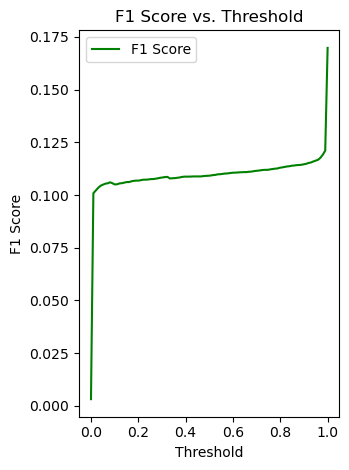

In [25]:
# Plot F1 Score vs. Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()

plt.tight_layout()
plt.show()


### Model Improvement


### Naive Bayes in Fraud Detection: Strengths and Limitations

**Strengths**:
- **Effective for certain types of data**: Works well with simple and independent features.

**Limitations**:
1. **Assumption of Feature Independence**:
   - **Issue**: Naive Bayes assumes features are independent, which is often not true in real-world data where features can be correlated.
   - **Impact**: This can reduce accuracy as it oversimplifies the data.

2. **Handling Imbalanced Classes**:
   - **Issue**: The issue arises here is that fraudulent transactions are rarely compared to legitimate ones.
   - **Impact**: The model might become biased for legitimate transactions, potentially overlooking fraudulent ones.

3. **Sensitivity to Noisy Data**:
   - **Issue**: Naive Bayes can be affected by noisy or irrelevant features.
   - **Impact**: Noise can lead to inaccurate predictions as the model relies on accurate feature probabilities.

4. **Feature Engineering Requirement**:
   - **Issue**: Requires careful crafting of features to capture meaningful patterns.
   - **Impact**: Without effective feature engineering, the model may miss important fraud indicators.

5. **Limited Expressiveness**:
   - **Issue**: It's a simple model and might not capture complex data patterns.
   - **Impact**: May not detect sophisticated fraud schemes as effectively as advanced models.

6. **Difficulty with Continuous Features**:
   - **Issue**: Often requires discretizing continuous features or assuming a specific distribution.
   - **Impact**: If the assumption is incorrect, it can lead to poor performance.

7. **No Model Updating**:
   - **Issue**: Does not update dynamically with new data.
   - **Impact**: Needs regular retraining to adapt to new fraud patterns, or it may miss emerging tactics.

**Mitigating Limitations**:
- **Feature Engineering**: Carefully design and select features to reduce noise and capture relevant patterns.
- **Handling Imbalance**: Use techniques like resampling or class weighting to balance the dataset.
- **Combining Models**: Use Naive Bayes alongside other models to leverage strengths and cover weaknesses.
- **Regular Updates**: Frequently update the model with new data to keep up with evolving fraud tactics.

Despite its limitations, Naive Bayes can be useful when combined with other methods to enhance fraud detection.

Now , let's compare with other algorithm that which one is better 

In [26]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Train the model
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [27]:
# Predictions and evaluation
y_pred_lr = lr.predict(x_test)
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1]))

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {lr_accuracy:.2f}')


Logistic Regression:
[[85295    12]
 [   50    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9783093967187025
Accuracy: 1.00


In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [29]:
y_pred_rf = model.predict(x_test)

print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {rf_accuracy:.2f}')

Random Forest:
[[85300     7]
 [   30   106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.78      0.85       136

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9482176054099415
Accuracy: 1.00


As  according to my prospective , accuracy should not be 100%; if it represents 100% , it means model is overtrained 

### Practical Implementation


Deploying a fraud detection model involves several important ethical considerations to ensure it is fair, transparent, and responsible. Here's a clearer explanation of the main ideas:

### 1. **Privacy**

- **Data Collection and Usage**: Make sure personal data is collected and used legally (like GDPR and CCPA rules). Inform users regarding the collection of their data and provide them with the power to manage it.
- **Data Security**: Protect sensitive data with strong security measures to prevent breaches. Encrypt data during transfer and storage.

### 2. **Bias and Fairness**

- **Algorithmic Bias**: Be aware of and reduce biases in the model. Biases, if left unchecked, can result in unfair treatment for specific populations.
- **Fairness**: Ensure the model treats all demographics fairly. Regularly check and adjust the model to maintain equity.

### 3. **Transparency**

- **Model Explainability**: Make the model's workings and decision factors clear. Users and stakeholders should have a transparent understanding of the decision-making process.
- **Clear Communication**: Inform users about the model's limitations and the possibility of errors, such as false positives or negatives.

### 4. **Accountability**

- **Human Oversight**: Include human review for critical decisions, especially those significantly affecting individuals. Automated systems should assist, not replace, human judgment.
- **Redress Mechanisms**: Provide ways for individuals to appeal or challenge the model's decisions and have processes to correct mistakes.

### 5. **Impact on Users**

- **False Positives and Negatives**: Minimize errors to avoid inconveniencing users or causing financial loss.
- **User Experience**: Ensure the fraud detection process is user-friendly and doesn’t create unnecessary burdens.

### 6. **Legal and Regulatory Compliance**

- **Regulations**: Follow laws and regulations related to fraud detection and data protection. Stay updated on legal requirements.
- **Ethical Standards**: Follow ethical guidelines and best practices in AI and machine learning. Consult ethical review boards if possible.

### 7. **Model Evolution and Maintenance**

- **Continuous Improvement**: Regularly update the model to address new fraud patterns and user behaviors. Ensure updates don’t introduce new biases.
- **Stakeholder Engagement**: Involve users and other stakeholders in discussions about the model’s impact. Consider their feedback in decisions.

### Example Considerations

- **Scenario**: A transaction is wrongly flagged as fraudulent.
  - **Solution**: Quickly notify the user and provide a way to resolve the issue.

- **Scenario**: The model unfairly targets transactions from certain areas.
  - **Solution**: Investigate and fix any biases. Ensure fair treatment for all regions.

Addressing these ethical considerations helps build trust in your fraud detection system and ensures it operates fairly and responsibly.

### Technical Implementation


In [33]:
# steps to implement Naive Bayes 

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [35]:
# Load your dataset
data = pd.read_csv('Credit Card.csv')

# Separate features and target
x = data.drop(columns='Class')  # Features
y = data['Class']               # Target

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [36]:
# Initialize the model
model = GaussianNB()  # For continuous features
# model = MultinomialNB()  # For categorical features
# model = BernoulliNB()  # For binary features


In [37]:
# Initialize and train model
model.fit(x_train, y_train)


GaussianNB()

In [39]:
# Predict
y_pred = model.predict(x_test)

In [40]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.99
Precision: 0.14
Recall: 0.66
F1 Score: 0.23
Confusion Matrix:
[[84759   548]
 [   46    90]]


Cross-validation is an effective method for enhancing performance and model evaluation in machine learning. This method can result in a more effective model for you:

### 1. **More Reliable Performance Estimates**

**a. **Reduced Overfitting**: Cross-validation helps in assessing how well the model generalizes to unseen data. By training and validating the model on different subsets of the data, it provides a more reliable estimate of the model’s performance and reduces the likelihood of overfitting.

**b. **Variance Reduction**: It reduces the variance in performance estimates that may arise from a single train-test split. This means the performance metrics (like accuracy, precision, recall) are averaged over multiple folds, leading to a more stable and accurate estimate of model performance.

### 2. **Better Utilization of Data**

**a. **Training on Multiple Subsets**: Cross-validation allows the model to be trained on different subsets of the data, maximizing the use of available data for training. For every data point, it is included in the training dataset several times but only in the validation dataset once.

**b. **Improved Model Validation**: It provides a thorough way of validating the model on multiple partitions of the dataset, ensuring that the model is evaluated on various subsets, which helps in understanding its performance across different scenarios.

### 3. **Hyperparameter Tuning**

**a. **Model Selection**: Cross-validation is often used in hyperparameter tuning to select the best set of hyperparameters. By evaluating different hyperparameter configurations on multiple folds, you can choose the configuration that performs best on average.

**b. **Grid Search**: It’s commonly used with grid search techniques to systematically work through multiple combinations of hyperparameters, ensuring a more comprehensive search for optimal hyperparameters.

### 4. **Bias-Variance Tradeoff**

**a. **Bias and Variance Assessment**: Cross-validation can help in understanding the bias-variance tradeoff of your model. By comparing performance metrics across different folds, you can diagnose whether your model is suffering from high bias (underfitting) or high variance (overfitting).

**b. **Model Improvement**: By identifying whether the model consistently underperforms or overperforms on certain folds, you can make adjustments to the model, features, or training process to improve its performance.

### 5. **Validation of Different Models**

**a. **Comparison of Models**: Cross-validation allows for a fair comparison between different models. By using the same folds for all models, you ensure that performance differences are due to the models themselves rather than random fluctuations in the train-test split.

**b. **Model Robustness**: It helps in evaluating how robust a model is by observing its performance consistency across different subsets of the data.



### Types of Cross-Validation

**1. **K-Fold Cross-Validation**: The data is allocated to \( k \) subset (folds). The model undergoes training using \( k-1 \) sets of data and validate on the remaining fold. This procedure undergoes \(k\) iterations, with different validation sets in each run.

**2. **Stratified K-Fold Cross-Validation**: Similar to k-fold, but ensures that each fold has approximately the same proportion of class labels as the entire dataset. This proves to be effective in handling imbalanced datasets.

**3. **Leave-One-Out Cross-Validation (LOOCV)** : In k-fold cross-validation, when k matches the number of data points. Each training dataset is formed by selecting all data points except one, which is employed as the test dataset.

**4. **Group K-Fold Cross-Validation**: Used when there are groups or clusters within the data. The model is trained and validated while keeping the groups separate, ensuring that data from the same group does not appear in both training and validation sets.

In summary, cross-validation enhances model evaluation by providing more reliable performance metrics, improving data utilization, and assisting in hyperparameter tuning. It helps in building robust models that generalize well to new, unseen data.

In [42]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=5) 

# Print cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.2f}')
print(f'Standard Deviation of CV Scores: {cv_scores.std():.2f}')

Cross-Validation Scores: [0.98948422 0.992732   0.99482102 0.99211741 0.99276698]
Mean CV Score: 0.99
Standard Deviation of CV Scores: 0.00
